In [9]:
import pandas as pd
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
tfidf = CountVectorizer()

# TP : our's O oasis O
# FP : our's O oasis X
# FN : our's X oasis O

# DBSCAN
df1=pd.read_csv('../Data/2019/2019_cluster_topics3.csv', encoding='utf-8-sig') 
df2=pd.read_csv('../Data/2019/2019_DBSCAN_new3.csv', encoding='utf-8-sig')


# K-Menas
# df1=pd.read_csv('../Data/2019/2019_kmeans_topics_231.csv','r',encoding='utf-8-sig')
# df2=pd.read_csv('../Data/2019/2019_kmeans_231.csv', encoding='utf-8-sig')


df3=pd.read_csv('../Data/2019/2019_big_topics.csv', encoding='cp949')

article_topics=[]
for topic in df1['topics']:
    arr=re.sub("[\[,'\]]", '',topic).split(' ')
    arr=", ".join(arr)
    article_topics.append(arr)


big_topics=[]
for topic in df3['topics']:
    arr=re.sub("[\[,'\]]", '',topic).split(' ')
    arr=", ".join(arr)
    big_topics.append(arr)

tmp = []
N = 50
top_clusters = Counter(df2['labels'].tolist()).most_common(N)

for item in top_clusters:
    tmp.append(article_topics[item[0]])
    
article_topics = tmp

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
sims = []
TP1=0
TP2=0
FP=0
FN=0

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity


for topic in article_topics:
    similarity=[]

    for btopic in big_topics:
        topic_list = []
        topic_list.append(topic)
        topic_list.append(btopic)

        tfidf_vect_simple = TfidfVectorizer(min_df=1)
        feature_vect_simple = tfidf_vect_simple.fit_transform(topic_list)

        feature_vect_dense = feature_vect_simple.todense()

        vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
        vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

        similarity_simple = cos_similarity(vect1, vect2)
        similarity.append(similarity_simple)
    
    sims.append(similarity)
    check=False
    for sim in similarity:
        if sim >= 0.5:
            check=True
            break
    if not check:
        FP += 1
    else:
        TP1 += 1

print('----------------')            
for topic in big_topics:

    similarity=[]
    for itopic in article_topics:
        topic_list = []
        topic_list.append(topic)
        topic_list.append(itopic)

        tfidf_vect_simple = TfidfVectorizer(min_df=1)
        feature_vect_simple = tfidf_vect_simple.fit_transform(topic_list)

        feature_vect_dense = feature_vect_simple.todense()

        vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
        vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

        similarity_simple = cos_similarity(vect1, vect2)
        similarity.append(similarity_simple)
        

    check=False
    for sim in similarity:
        if sim >= 0.5:
            check=True
            break
    if not check:
        FN+= 1
    else:
        TP2+= 1
    
precision=(TP1)/(TP1+FP)
recall=(TP2)/(TP2+FN)

if(precision + recall == 0):
    F_score = 0
else:    
    F_score=2*((precision*recall)/(precision+recall))

print("precision:{},recall:{},F_score:{}".format(precision,recall,F_score))

----------------
precision:0.04,recall:0.75,F_score:0.07594936708860758


Text(0, 0.5, 'Similarity')

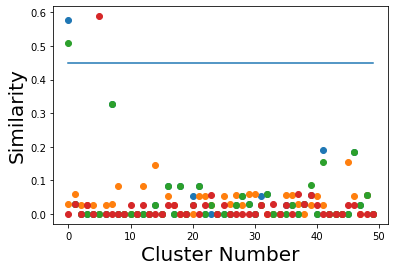

In [15]:
import matplotlib.pyplot as plt

cluster_num = range(0, len(sims), 1)
size = len(sims[0])
for i in range(size):
    similarity = []
    for sim in sims:
        similarity.append(sim[i])
    plt.scatter(x = cluster_num, y = similarity)
# plt.xticks(np.arange(0, 22, 2))
plt.plot([0.45] * N)
plt.xlabel("Cluster Number", fontsize = 20)
plt.ylabel("Similarity", fontsize = 20)